Мышковец С.А., v.01 21.09.2022

Решение задачи: Анализ текста
    
С использованием библиотек Numpy и Pandas написать программу реализующую:

 - Загрузку текстового файла из корневого каталога объемом не менее 20000 символов включая пробелы и все символы.
 - Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно).
 - Подсчет длин предложений и их количества.
 - Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы "объекты - признаки".
 - Построение гистограммы частоты встречаемости слов.

Вывод:
    Библиотека nltk оказалась самая простая в применении для анализа текста на русском языке.

# Загрузка данных

Открываем файл.

In [395]:
with open(r'C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\Тонкое искусство пофигизма.txt', "r", encoding="utf-8") as file:
    text = file.read()

# Предварительная обрабатка текста (препроцессинг)

Определяем длину текста.

In [396]:
len(text)

27560

Приводим символы в единый регистр (нижний).

In [397]:
text = text.lower()

Очищаем текст от знаков пунктуации, лишних пробельных символов и цифр:
 - выводим все знаки пунктуации.

In [398]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


 - добавляем к знакам пунктуации символы переноса строки, табуляции и другие символы.

In [399]:
spec_chars = string.punctuation + '\n\xa0«»\t—…' 

 - удаляем символы:
   - используем поэлементную обработку строки: разделяем исходную строку text на символы, 
   - оставляем только символы, не входящие в набор spec_chars
   - объединяем список символов в строку

In [400]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [401]:
text = remove_chars_from_text(text, spec_chars)
text = remove_chars_from_text(text, string.digits)

# Токенизизация и лемматизация текста

Разбиваем очищенный текст на составные части – токены. Для задачи частотного анализа необходимо разбить текст на слова. 
Для этого используем готовый метод библиотеки nltk.

In [402]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\myshk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [403]:
from nltk import word_tokenize
text_tokens = word_tokenize(text)

In [405]:
text_tokens[:5]

['чарльз', 'буковски', 'был', 'алкоголиком', 'бабником']

Вычисляем количество слов в предобработанном тексте.

In [406]:
len(text_tokens)

4189

Лемматизируем полученный список слов.

In [407]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
text_tokens_normal_form = []

In [408]:
for word in text_tokens:
    p = morph.parse(word)[0]
    text_tokens_normal_form.append(p.normal_form)

In [410]:
text_tokens_normal_form[:5]

['чарльз', 'буковск', 'быть', 'алкоголик', 'бабник']

Преобразовываем список токенов к классу Text библиотеки nltk для применения инструментов частотного анализа.


In [411]:
text = nltk.Text(text_tokens_normal_form)

# Статистика встречаемости слов в тексте

Для подсчёта статистики распределения частот слов в тексте применяется класс FreqDist (frequency distributions).

In [412]:
from nltk.probability import FreqDist
fdist = FreqDist(text)

Выводим переменную fdist (словарь, содержащий токены и их частоты – количество раз, которые эти слова встречаются в тексте).

In [413]:
fdist

FreqDist({'и': 194, 'не': 116, 'в': 94, 'вы': 87, 'что': 80, 'на': 71, 'мы': 61, '–': 56, 'это': 50, 'я': 49, ...})

Можно воспользоваться методом most_common для получения списка кортежей с наиболее часто встречающимися токенами

In [414]:
fdist.most_common(10)

[('и', 194),
 ('не', 116),
 ('в', 94),
 ('вы', 87),
 ('что', 80),
 ('на', 71),
 ('мы', 61),
 ('–', 56),
 ('это', 50),
 ('я', 49)]

# Удаление стоп-слов

In [415]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\myshk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Получаем  список стоп-слов для русского языка

In [416]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

По необходимости расширяем список стоп-слов.

In [418]:
russian_stopwords.extend(['это', 'нею', '–', 'весь', 'который', 'изз', 'лишь', 'ещё', 'поскольку', 'свой', 'наш', 'ваш'])

Получаем словарь слов, не входящих в список стоп-слов.

In [419]:
def no_stop_words(dct):
    clean_dct = {}
    for key, value in dct.items():
        if key not in russian_stopwords:
            clean_dct[key] = value
    return clean_dct
fdist_sw = no_stop_words(fdist)

Приводим словарь к типу FreqDist.

In [423]:
fdist_sw = FreqDist(fdist_sw)

In [424]:
fdist_sw

FreqDist({'человек': 36, 'жизнь': 28, 'большой': 22, 'наплевать': 17, 'неудача': 14, 'хороший': 14, 'важный': 13, 'буковск': 11, 'успех': 11, 'умение': 11, ...})

Выводим 10 самых часто встречающихся слов в тексте.

In [425]:
fdist_sw.most_common(10)

[('человек', 36),
 ('жизнь', 28),
 ('большой', 22),
 ('наплевать', 17),
 ('неудача', 14),
 ('хороший', 14),
 ('важный', 13),
 ('буковск', 11),
 ('успех', 11),
 ('умение', 11)]

Строим график частоты встречаемости слов.

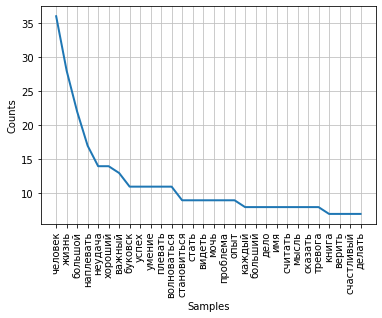

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [426]:
fdist_sw.plot(30,cumulative=False)

Преобразовываем FreqDist к DataFrame.

In [427]:
import pandas as pd

In [428]:
df = dict(fdist_sw)

In [429]:
colNames = ['freq']
df = pd.DataFrame.from_dict(df, orient='index', columns=colNames)

In [430]:
df.sort_values('freq', ascending=False).head(10)

freq
человек      36
жизнь        28
большой      22
наплевать    17
хороший      14
неудача      14
важный       13
успех        11
плевать      11
буковск      11

Строим гистограмму частоты встречаемости слов.

(array([1.319e+03, 4.300e+01, 1.900e+01, 3.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  4.5,  8. , 11.5, 15. , 18.5, 22. , 25.5, 29. , 32.5, 36. ]),
 <BarContainer object of 10 artists>)

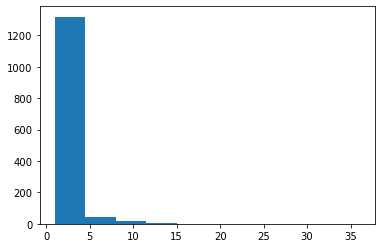

In [431]:
import matplotlib.pyplot as plt
plt.hist(df)

In [434]:
df.sum()

freq    2317
dtype: int64

# Подсчет количества и длины предложений в исходном тексте.

In [435]:
with open(r'C:\Users\myshk\DS TMS\DS3onl\DS3onl\Sviatlana Myshkavets\Тонкое искусство пофигизма.txt', "r", encoding="utf-8") as file:
    text = file.read()
from nltk.tokenize import sent_tokenize
sent_tokenize(text)[:5]

['Чарльз Буковски был алкоголиком, бабником, заядлым игроком, хамом, жмотом, нищебродом, а в худшие дни поэтом.',
 'Это последний человек, которого вы взяли бы за образец или ожидали увидеть в книге практических советов.',
 'А значит, с него и начнем.',
 'Буковски хотел быть писателем.',
 'Но десятилетиями его отвергал почти каждый журнал, почти каждая газета, почти каждый агент и издатель, к которым он обращался.']

Вычисляем количество предложений.

In [436]:
len(sent_tokenize(text))

404

Разбиваем предложения на слова.

In [437]:
tknzd_text = [word_tokenize(t) for t in sent_tokenize(text)]

Убираем знаки препинания.

In [438]:
for t in tknzd_text:
    for w in t:
        if w in spec_chars:
            t.remove(w)

In [439]:
sentence_length = []
for s in tknzd_text:
    sentence_length.append(len(s))    

Подсчитываем длину слов в каждом предложении.

In [440]:
sorted(sentence_length, reverse=True)[:15]

[40, 36, 36, 35, 35, 34, 32, 31, 28, 28, 28, 28, 28, 27, 27]

In [441]:
import pandas as pd
import numpy as np
colNames = ['word count']
df = pd.DataFrame(list(sentence_length), columns=colNames)
df.index = np.arange(1, len(df)+1)

In [442]:
df.head()

word count
1          15
2          16
3           6
4           4
5          19

Строим график частоты длин предложений.

(array([ 83., 106.,  79.,  59.,  38.,  11.,  20.,   2.,   5.,   1.]),
 array([ 1. ,  4.9,  8.8, 12.7, 16.6, 20.5, 24.4, 28.3, 32.2, 36.1, 40. ]),
 <BarContainer object of 10 artists>)

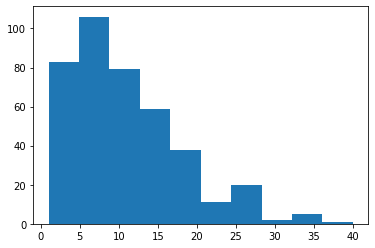

In [443]:
import matplotlib.pyplot as plt
plt.hist(df)